# Pikunda-Munda-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)
    * [Unterscheidung I / II](#Unterscheidung-I-/-II)
    * [Mutmaßliche PIKMUN Schalen am oberen Ubangi](#Mutmaßliche-PIKMUN-Schalen-am-oberen-Ubangi)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'PKM'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [301]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

# display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [302]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,18.0,3.290676
GE,529.0,96.709324


In [303]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

In [304]:
np.sum(df['Anzahl'].loc[df['Typ'].str.contains(" ")])

135.0

In [305]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,129.0,24.385633
sicher,400.0,75.614367


In [306]:
df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss     Ort                             bef_nr                   
Likwala-Esobe Bojenjo (Fpl. 292)              87/101       4.0     91.0
              Boleko (Fpl. 285)               87/101       3.0    109.0
              Bwanela (Fpl. 298)              87/102       1.0     26.0
              Ebambe (Fpl. 297)               87/101       9.0    478.0
              Epena (Fpl. 306)                87/101       1.0     50.0
              Itanga (Fpl. 305)               87/103       1.0     42.0
              Epena (Fpl. 303)                 87/101       3.0     49.9
              Likwala-Esobe km 186 (Fpl. 291) 87/186       1.0     11.0
              Lokolélé (Fpl. 290)             87/101       1.0      7.0
              Misongo (Fpl. 288)              87/101       2.0     67.0
              Mosenge (Fpl. 299)              87/101       1.0      7.0
              Munda (Fpl. 304)                87/1        10.0    434.0
                                              87/101       1.0      7.0
                                              87/2-1-1    33.0   6692.0
                                              87/2-1-3    75.0   9906.0
                                              87/3        19.0   1796.0
              Yumba (Fpl. 289)                87/101       1.0      8.0
                                              87/102       1.0     74.0
Sangha        Bobusa (Fpl. 239)               87/1         2.0     25.0
              Bokonongo (Fpl. 250)            87/102       2.0     33.0
              Ifondo (Fpl. 253)               87/101       4.0     37.0
              Ikelemba (Fpl. 260)             87/101      20.0    418.0
              Itandi (Fpl. 256)               87/101       2.0     67.0
              Likaya (Fpl. 247)               87/101       1.0    110.0
              Mandombe (Fpl. 259)             87/101       1.0     12.0
              Mitula (Fpl. 251)               87/102       3.0    164.0
              Molanda (Fpl. 258)              87/101       3.0     39.0
                                              87/102       1.0      9.0
              Monjolomba (Fpl. 243)           87/101       2.0     18.0
              Mosanya (Fpl. 262)              87/101       3.0    103.0
              Pikunda (Fpl. 255)              87/1       164.0   4459.0
                                              87/101     108.0   6876.0
                                              87/2        37.0    680.0
                                              87/3         1.0     29.0
              Sosolo (Fpl. 241)               87/101       5.0    108.0
Zaire/Kongo   Maberu (Fpl. 235)               87/101       1.0     33.0
              Sungu (Fpl. 236)                87/101       2.0    207.0

Anzahl Fundorte:

In [307]:
len(df_pivot.index)

37

In [309]:
a = pd.Series({'Grabungen':np.sum(df['Anzahl'].loc[~df['bef_art'].str.contains('Oberfl')]),
               'Surveyfunde':np.sum(df['Anzahl'].loc[df['bef_art'].str.contains('Oberfl')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Grabungen,358.0,65.447898
Surveyfunde,189.0,34.552102


In [310]:
df.head()

,objID,ort_kurz,Ort,bef_nr,bef_art,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Gr_Clist,Typ
0,333,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,7,G,419.0,1.0,200,PKM
1,337,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,3,G,691.0,1.0,500,PKM
2,341,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,8,G,623.0,1.0,500,PKM
3,342,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,9,G,344.0,1.0,200,PKM
4,345,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,2,G,1671.0,1.0,500,PKM


In [313]:
# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df.ix[df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Survey'
df.ix[~df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Grabung'
df.ix[df['Typ'] == style, 'SICHERHEIT'] = 'sicher'
df.ix[df['Typ'].str.contains(' '), 'SICHERHEIT'] = 'fraglich'

a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Grabungen,358.0,65.447898
Surveyfunde,189.0,34.552102


In [314]:
df_pivot = df.pivot_table(values='objID', index='Gr_Clist', columns='FEAT', aggfunc=len)
df_pivot['Grabung'] = df_pivot['Grabung'] / df_pivot['Grabung'].sum() * 100
df_pivot['Survey'] = df_pivot['Survey'] / df_pivot['Survey'].sum() * 100
df_pivot

FEAT,Grabung,Survey
Gr_Clist,,
30,29.213483,3.703704
70,50.000000,73.015873
120,8.707865,17.460317
200,5.617978,2.645503
500,2.247191,0.529101
,4.213483,2.645503


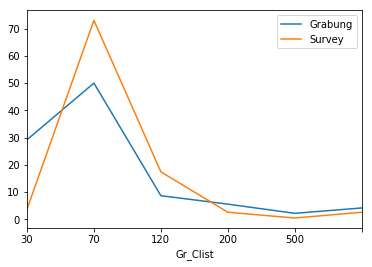

In [315]:
df_pivot['Grabung'].plot()
df_pivot['Survey'].plot()
plt.legend()

In [316]:
df.head()

,objID,ort_kurz,Ort,bef_nr,bef_art,ort_fluss,GE,Scherbe,Gewicht,Anzahl,Gr_Clist,Typ,FEAT,SICHERHEIT
0,333,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,7,G,419.0,1.0,200,PKM,Grabung,sicher
1,337,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,3,G,691.0,1.0,500,PKM,Grabung,sicher
2,341,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,8,G,623.0,1.0,500,PKM,Grabung,sicher
3,342,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,9,G,344.0,1.0,200,PKM,Grabung,sicher
4,345,MUN,Munda (Fpl. 304),87/2-1-1,Grube/Ofen,Likwala-Esobe,2,G,1671.0,1.0,500,PKM,Grabung,sicher


In [339]:
df_pivot = df.pivot_table(values='objID', index='SICHERHEIT', columns='FEAT', aggfunc=len)
df_pivot['Grabung'] = df_pivot['Grabung'] / df_pivot['Grabung'].sum() * 100
df_pivot['Survey'] = df_pivot['Survey'] / df_pivot['Survey'].sum() * 100
df_pivot

FEAT,Grabung,Survey
SICHERHEIT,,
fraglich,19.382022,39.153439
sicher,80.617978,60.846561


---

In [272]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [273]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,R,W,All
Typ,,,
PKM,NaN,12.0,12.0
PKM (?),2.0,4.0,6.0
All,2.0,16.0,18.0


In [274]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl Gewicht
ort_fluss     Ort                bef_nr               
Likwala-Esobe Yumba (Fpl. 289)   87/102               
Sangha        Pikunda (Fpl. 255) 87/1             1690
                                 87/2       16      83
Zaire/Kongo   Maberu (Fpl. 235)  87/101      2      25

In [340]:
# Individuelles Scherbengewicht
df_a['IndivGew'] = df_a['Gewicht'] / df_a['Anzahl']
df_a['IndivGew'].mean()

6.8

In [341]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Stücke:

In [342]:
np.sum(df_pivot['Anzahl'])

547.0

Gewicht insgesamt in kg:

In [343]:
np.sum(df_pivot['Gewicht']) / 1000

35.0799

## Scherbentypen

In [344]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,37.0,6.788991
R,177.0,32.477064
W,309.0,56.697248
B,22.0,4.036697


In [345]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

In [346]:
# nur Gefäße:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Scherbe) = 'G'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [347]:
df_pivot = df.pivot_table(values = 'Anzahl', index = ['Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

Anzahl    Prozent
Ort                bef_nr                     
Ebambe (Fpl. 297)  87/101         1   2.702703
Likaya (Fpl. 247)  87/101         1   2.702703
Munda (Fpl. 304)   87/1           1   2.702703
                   87/2-1-1      10  27.027027
                   87/2-1-3      15  40.540541
                   87/3           3   8.108108
Pikunda (Fpl. 255) 87/1           2   5.405405
                   87/101         3   8.108108
Sungu (Fpl. 236)   87/101         1   2.702703

In [348]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Ort', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
Ort,,
Ebambe (Fpl. 297),1,2.702703
Likaya (Fpl. 247),1,2.702703
Munda (Fpl. 304),29,78.378378
Pikunda (Fpl. 255),5,13.513514
Sungu (Fpl. 236),1,2.702703


## Technologische Merkmale (*fabrics*)

In [361]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [362]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [363]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [364]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1b,165,30.442804
1a,132,24.354244
1d,112,20.664207
1c,34,6.273063
1e,25,4.612546


In [365]:
a = pd.Series({'Typ 1':np.sum(df['Anzahl'].loc[df['Fabric'].str.contains("1|2")]),
               'Nicht-Typ 1':np.sum(df['Anzahl'].loc[~df['Fabric'].str.contains("1|2")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Nicht-Typ 1,12,2.214022
Typ 1,530,97.785978


In [366]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,423.0,88.865546
wenig,37.0,7.773109
mittel,14.0,2.941176
viel,2.0,0.420168
sehr viel,NaN,NaN


In [367]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [368]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,377,79.035639
F,69,14.465409
M,20,4.192872
C,8,1.677149
VC,3,0.628931


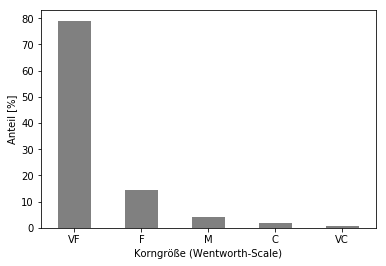

In [369]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [370]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,465,97.484277
S/Gl,7,1.467505
S/Laterit,2,0.419287
S/Gl/Laterit,1,0.209644
S/Org,1,0.209644
s,1,0.209644


### Brennfarbe

In [371]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,50,8.741259
Sonstig,158,27.622378
Weiß,364,63.636364


In [372]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [373]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

s       280
g       126
        103
bg       83
s s      44
g s      23
         22
bg s     21
g g      16
bg g      7
dtype: int64

### Oberfläche der Scherben

In [374]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,472.0,94.4
"glatt, sandig",1.0,0.2
glatt/leicht rau,1.0,0.2
glatt/rau,1.0,0.2
glatt/sandig,1.0,0.2
leicht rau,18.0,3.6
rau,5.0,1.0
sandig,1.0,0.2


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


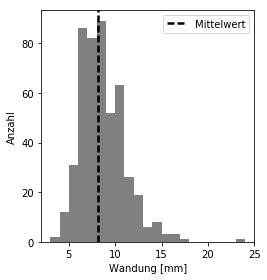

In [401]:
sql = """SELECT
           t_Obj.objID,
           t_obj.Form_Gef,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

ax = df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
#plt.gca().set_aspect(.25)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1]) - 2) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlabel("Wandung [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()
ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.savefig('../output/figs/3-1-2-1_PIKMUN_Wanddicke_insg.pdf', bbox_inches='tight')
plt.show()

In [402]:
df['Wandung'].describe()

count    484.000000
mean       8.154959
std        2.446690
min        3.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       24.000000
Name: Wandung, dtype: float64

In [403]:
df['Wandung'].var()

5.986290060400702

In [404]:
# Leere Stellen in Typ mit NaN ersetzen (np.nan)
df['Form_Gef'] = df['Form_Gef'].replace('', np.nan)
# Zeilen ohne Typ entfernen
df = df[pd.notnull(df['Form_Gef'])]

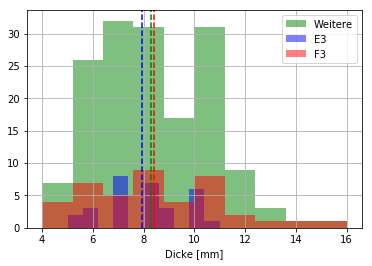

In [405]:
a = df.loc[df['Form_Gef'].str.contains("F3")]   # G1a-Schalen
b = df.loc[df['Form_Gef'].str.contains("E3")]   # G1b-Schalen
c = df.loc[~df['Form_Gef'].str.contains("F3") | ~df['Form_Gef'].str.contains("E3")]   # Rest

c['Wandung'].hist(histtype='stepfilled', stacked = True, fc = 'g', label = 'Weitere', alpha = 0.5)
b['Wandung'].hist(histtype='stepfilled', stacked = True, fc = 'b', label = 'E3', alpha = 0.5)
a['Wandung'].hist(histtype='stepfilled', stacked = True, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['Wandung'].mean(), color='g', linestyle = '--')
plt.axvline(b['Wandung'].mean(), color='b', linestyle = '--')
plt.axvline(a['Wandung'].mean(), color='r', linestyle = '--')

plt.xlabel("Dicke [mm]")
plt.legend(loc = 1)

# plt.show()

In [406]:
# Nur sichere Gefäße G1a und G1b

sql = """SELECT
           t_Obj.objID,
           t_obj.Form_Gef,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%')
           AND ((t_Obj.Wandung) != '')
           AND ((t_obj.Form_Gef) == 'F3')
           OR ((t_obj.Form_Gef) == 'E3'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

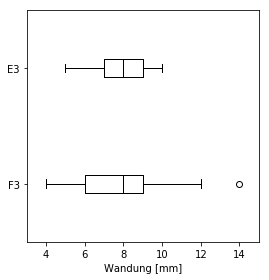

In [407]:
g1a = df['Wandung'].loc[df['Form_Gef'].str.contains("F3")]
g1b = df['Wandung'].loc[df['Form_Gef'].str.contains("E3")]
data = [g1a, g1b]

ax = plt.subplot(111)

bp = plt.boxplot(data, vert = False)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#plt.gca().set_aspect(6)
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlim(3,15)
plt.xlabel("Wandung [mm]")

ax.set_yticklabels(['F3', 'E3'])

plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['medians'], color='black')

plt.tight_layout()
plt.savefig('../output/figs/3-1-2-1_PIKMUN_Wanddicke_G1-Schalen.pdf', bbox_inches='tight')
plt.show()

## Gefäßformen

In [2]:
# Abfrage nur der sicheren Gef-Formen
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [3]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,101,62.732919
sicher,60,37.267081


In [4]:
# nur sichere Gef
df1 = df.loc[~df['Form_Gef'].str.contains(" ")]
# fragliche Gef
df2 = df.loc[df['Form_Gef'].str.contains(" ")]

In [5]:
df_pivot1 = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1

In [6]:
df_pivot2 = df2.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot2 = pd.DataFrame(df_pivot2)
# df_pivot2

In [7]:
fig = plt.figure(1)
fig.set_size_inches(12, 5.5)

plt.subplot(121)
df_pivot1['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('sichere Gefäße')

plt.subplot(122)
df_pivot2['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('unsichere Gefäße')

plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_GefForm1.pdf', bbox_inches='tight')
plt.show()

nur ganz sicher 'Pikunda-Munda':

In [8]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df1 = df1[df1['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [9]:
df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# df_pivot

In [10]:
df_pivot['objID'].sum()

57

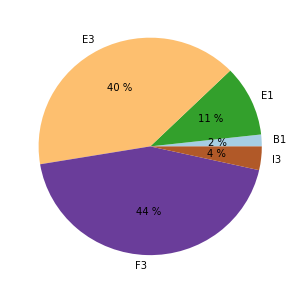

In [11]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_GefForm2.pdf', bbox_inches='tight')

### Proportionen

In [5]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Proportionen
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
df['muendungsD-muendH'] = df['muendungsD'] / df['muendungsH']

df['muendH-maxD'] = df['muendungsH'] / df['maxD']
df['muendH-muendungsD'] = df['muendungsH'] / df['muendungsD']


# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

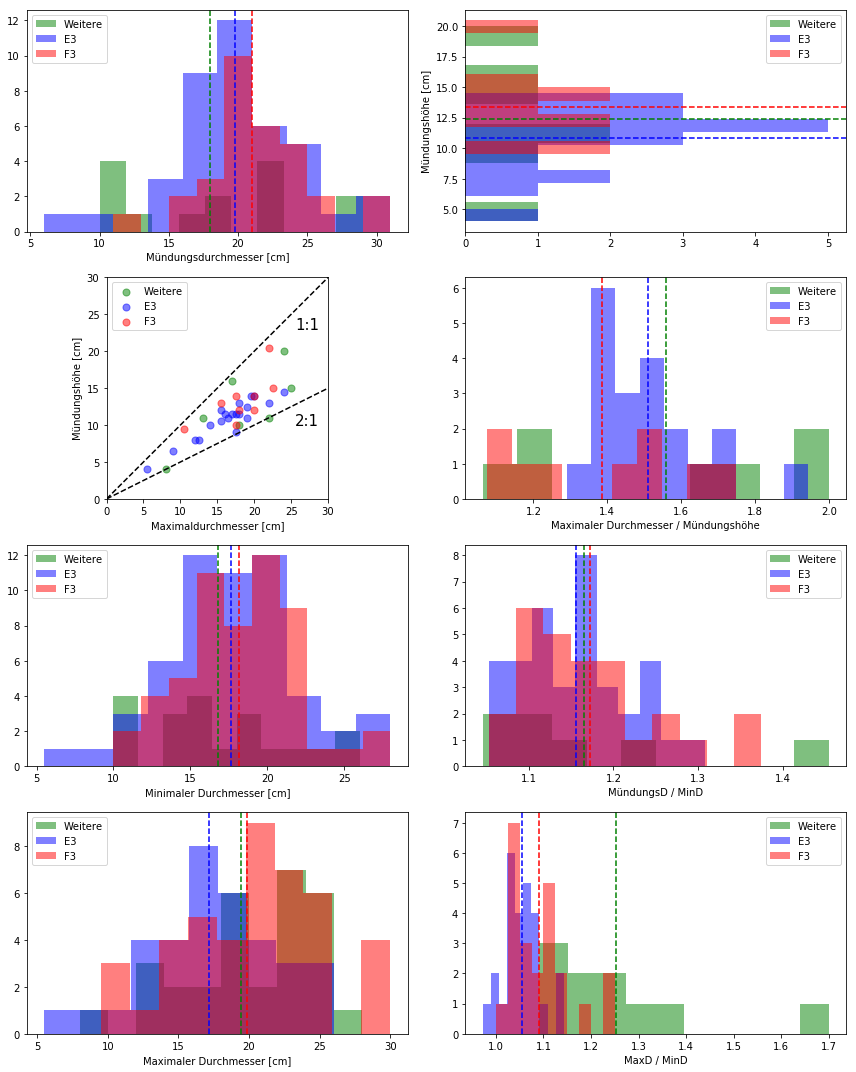

In [6]:
a = df.loc[df['Form_Gef'].str.contains("F3")]   # F3-Schalen
b = df.loc[df['Form_Gef'].str.contains("E3")]   # E3-Schalen
c = df.loc[~df['Form_Gef'].str.contains("E3|F3")]   # Rest

fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

c['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['muendungsD'].mean(), color='g', linestyle = '--')
plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

plt.xlabel("Mündungsdurchmesser [cm]")

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

ax = plt.subplot(422)

c['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5, orientation='horizontal')
b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5, orientation='horizontal')
a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5, orientation='horizontal')

plt.axhline(c['muendungsH'].mean(), color='g', linestyle = '--')
plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(423)

plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'g', s = 50, label = 'Weitere')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'b', s = 50, label = 'E3')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'r', s = 50, label = 'F3')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,30],[0, 10,20,30], color='black', linestyle = '--')
ax.text(25.5, 23, '1:1', color='black', fontsize=15)

ax.plot([0, 10,20,30],[0, 5,10,15], color='black', linestyle = '--')
ax.text(25.5, 10, '2:1', color='black', fontsize=15)

plt.xlim(0,30) 
plt.ylim(0,30) 

ax.set_aspect('equal')

ax = plt.subplot(424)

c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['maxD-muendH'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

ax = plt.subplot(425)

c['minD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['minD'].mean(), color='g', linestyle = '--')
plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

#df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

ax = plt.subplot(426)

c['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['muend-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

#df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
#plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
# plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

ax = plt.subplot(427)

c['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['maxD'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

# df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

ax = plt.subplot(428)

c['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'E3', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'F3', alpha = 0.5)

plt.axvline(c['max-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
# plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.legend(loc = 1)
plt.xlabel("MaxD / MinD")

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_Keramik-Abmessungen.pdf', bbox_inches='tight')
plt.show()

In [7]:
# F3
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muendungsD-muendH,muendH-maxD,muendH-muendungsD,muend-min,max-min
count,31.000000,9.000000,55.000000,16.00000,43.000000,24.000000,20.0,9.000000,9.000000,9.000000,9.000000,27.000000,23.000000
mean,21.032258,13.333333,18.145455,7.96875,19.860465,2.687500,0.0,1.385109,1.521391,0.742228,0.674298,1.171822,1.090738
std,3.930512,3.250000,3.843793,2.33430,4.694634,1.966085,0.0,0.242836,0.257333,0.131154,0.114972,0.080914,0.065042
min,11.000000,9.500000,10.000000,3.50000,9.500000,0.500000,0.0,1.073171,1.157895,0.571429,0.500000,1.052632,1.000000
25%,19.000000,12.000000,16.000000,6.37500,17.250000,1.500000,0.0,1.192308,1.357143,0.666667,0.612245,1.113248,1.047619
50%,20.000000,13.000000,18.000000,7.25000,20.000000,2.000000,0.0,1.428571,1.571429,0.700000,0.636364,1.157895,1.081081
75%,24.000000,14.000000,20.000000,10.12500,22.250000,3.500000,0.0,1.500000,1.633333,0.838710,0.736842,1.195238,1.111111
max,31.000000,20.500000,28.000000,12.50000,30.000000,10.000000,0.0,1.750000,2.000000,0.931818,0.863636,1.375000,1.250000


In [8]:
# E3
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muendungsD-muendH,muendH-maxD,muendH-muendungsD,muend-min,max-min
count,40.000000,20.000000,55.000000,24.000000,35.000000,27.000000,25.0,20.000000,20.000000,20.000000,20.000000,36.000000,26.000000
mean,19.762500,10.850000,17.645455,7.645833,17.157143,4.370370,0.0,1.509587,1.652632,0.668318,0.611648,1.155351,1.054271
std,4.643699,2.661124,4.278145,2.118650,4.427141,4.248512,0.0,0.152614,0.175950,0.061771,0.065123,0.064701,0.038208
min,6.000000,4.000000,5.500000,2.500000,5.500000,1.500000,0.0,1.291667,1.384615,0.514286,0.500000,1.052632,0.972222
25%,17.750000,9.750000,15.500000,6.875000,14.750000,3.000000,0.0,1.392469,1.534091,0.639722,0.560155,1.106953,1.032527
50%,20.000000,11.500000,18.000000,8.000000,17.500000,4.000000,0.0,1.489130,1.624348,0.671569,0.615689,1.157072,1.054094
75%,22.250000,12.625000,20.000000,8.625000,20.000000,4.250000,0.0,1.563179,1.785232,0.718149,0.651961,1.200000,1.075985
max,31.000000,14.500000,28.000000,11.000000,26.000000,25.000000,0.0,1.944444,2.000000,0.774194,0.722222,1.307692,1.142857


In [9]:
# Rest
c.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muendungsD-muendH,muendH-maxD,muendH-muendungsD,muend-min,max-min
count,14.000000,7.000000,20.000000,3.000000,30.000000,8.000000,4.0,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000
mean,17.964286,12.428571,16.825000,12.833333,19.400000,5.125000,0.0,1.558712,1.563339,0.682317,0.771691,1.165684,1.251950
std,6.425503,5.126960,4.810282,3.883727,4.657956,2.150581,0.0,0.403380,0.651346,0.185284,0.395674,0.141508,0.180064
min,10.000000,4.000000,10.000000,8.500000,8.000000,1.000000,0.0,1.062500,0.656250,0.500000,0.400000,1.045455,1.090909
25%,11.875000,10.500000,14.000000,11.250000,17.250000,4.375000,0.0,1.190909,1.060227,0.527778,0.517857,1.076282,1.135455
50%,18.000000,11.000000,16.000000,14.000000,20.500000,5.500000,0.0,1.666667,1.800000,0.600000,0.555556,1.125000,1.215385
75%,22.000000,15.500000,19.625000,15.000000,22.000000,6.000000,0.0,1.900000,1.933333,0.839744,0.943377,1.191111,1.273109
max,29.000000,20.000000,26.000000,16.000000,28.000000,8.500000,0.0,2.000000,2.500000,0.941176,1.523810,1.454545,1.700000


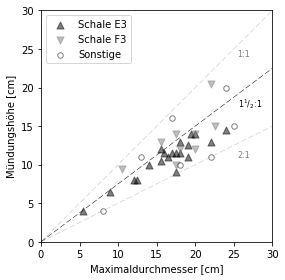

In [15]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'black', s = 50, marker = "^", label = 'Schale E3')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "v", label = 'Schale F3')#
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, facecolors='white', edgecolors='black', s = 30, marker = "o", label = 'Sonstige')
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,30],[0, 10,20,30], color='grey', linestyle = '--', linewidth=0.25)
ax.text(25.5, 24, '1:1', color='grey', fontsize=8)

ax.plot([0, 10,20,30],[0, 5,10,15], color='grey', linestyle = '--', linewidth=0.25)
ax.text(25.5, 11, '2:1', color='grey', fontsize=8)

ax.plot([0, 10, 20, 30],[0, 7.5, 15, 22.5], color='black', linestyle = '--', linewidth=0.5)
ax.text(25.5, 17.5, '1$^1/_2$:1', color='black', fontsize=8)

plt.xlim(0,30) 
plt.ylim(0,30) 

ax.set_aspect('equal')
plt.tight_layout()

plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

## Bauch

In [507]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [509]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,51,22.270742
C1/D2,21,9.170306
C1,19,8.296943
C1/leicht,17,7.423581
B1/D1,13,5.676856


In [510]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

### Mündungs- und Randformen

In [512]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [520]:
# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,65,31.707317
M3,65,31.707317
M5,55,26.829268
M6,8,3.902439
M4,7,3.414634


In [522]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [523]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B2,64,29.767442
B1,63,29.302326
B3,56,26.046512
A1,19,8.837209
B1.1,4,1.860465


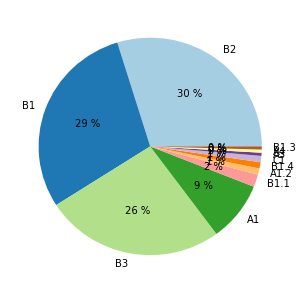

In [524]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

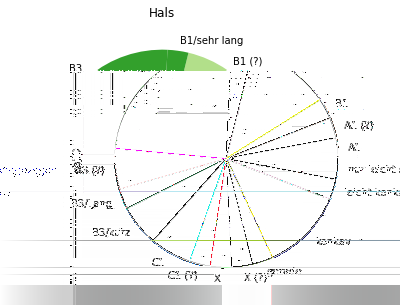

In [525]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

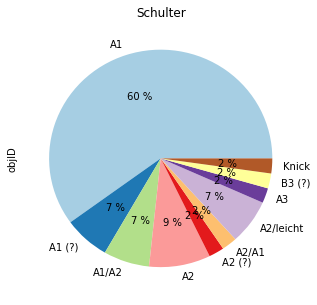

In [526]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Boden

In [528]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# Fragezeichen löschen
df['Form_Boden'] = df['Form_Boden'].map(lambda x: x.rstrip(' (?)'))
df['Form_Boden'] = df['Form_Boden'].apply(lambda x: x.split('/')[0])\

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Form_Boden,,
B1,55,85.9375
B2,3,4.6875
B4,2,3.1250
B6,4,6.2500


In [529]:
len(df['Form_Boden'])

64

## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


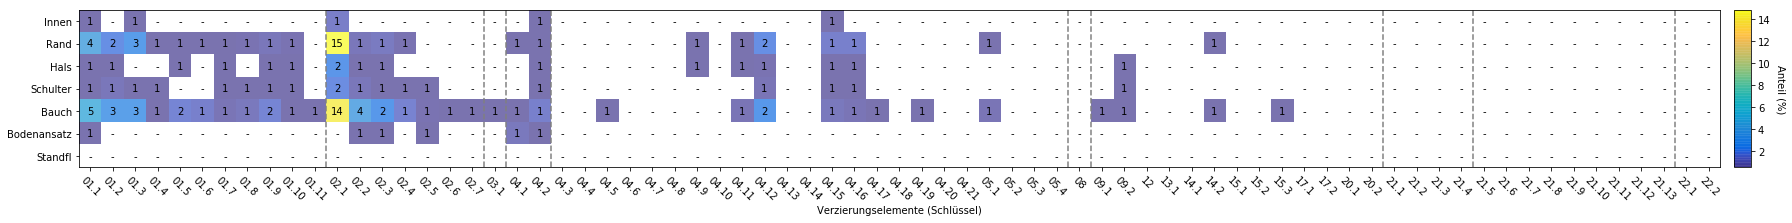

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [86]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

In [87]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
#df_pivot

In [88]:
# Sortierung für graphische Darstellung umdrehen
#df_pivot = df_pivot.sort_index(ascending=False)
#plt.rcdefaults()
#%matplotlib inline

In [89]:
fig = plt.figure()
fig.set_size_inches(15, 7.5)

ax = plt.subplot(111)

plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()

ax.tick_params(top = 'off', bottom = 'off', right = 'off', left = 'off')

plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

für einen Mantel-Test in R die Matrix in eine Liste umwandeln und als CSV zwischenspeichern

In [90]:
df_pivotBigList = df_pivotBig_perc.unstack()
df_pivotBigList = pd.DataFrame(df_pivotBigList)
df_pivotBigList = df_pivotBigList.reset_index()
df_pivotBigList = df_pivotBigList[['pos', 'verzName', 0]]
df_pivotBigList = df_pivotBigList.rename(columns={0 : 'n'})
#display(df_pivotBigList.head())
df_pivotBigList.to_csv('../data/processed/Keramik - PosVerz-Matrix - PIKMUN.csv', index = False, encoding='utf-8')

In [91]:
fig = plt.figure()
fig.set_size_inches(25, 15)
plt.imshow(df_pivotBig_perc, interpolation='nearest', alpha = 0)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index)
#plt.xticks(range(len(df_pivotBig_perc.columns)), v.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivotBig_perc):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
#plt.savefig('output/3-1-2-1_Pikunda-Munda_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [92]:
df.head()

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
0,333,3,1,2 Rand,02.1,horizontale Rille,PKM,F3
1,333,7,1,5 Bauch,02.1,horizontale Rille,PKM,F3
2,333,7,5,5 Bauch,02.3,diagonale Rillen,PKM,F3
3,333,7,8,5 Bauch,04.2,Wiegeband/Klinge,PKM,F3
4,333,7,9,5 Bauch,01.1,Schachbrettmuster,PKM,F3


In [93]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


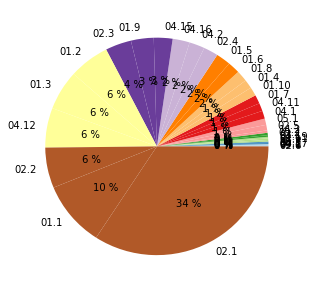

In [94]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [95]:
a = pd.Series({'Riefen und Rillen':len(df.loc[df['verzName'].str.contains("01.|02.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("01.|02.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Riefen und Rillen,692,81.507656
Sonstiges,157,18.492344


%-Anteil von Schachbrettmustern (01.1--4)

In [96]:
len(df.loc[df['verzName'].str.contains("01.1|01.2|01.3|01.4")].index) / a[0].sum() * 100

24.263839811542994

%-Anteil von Wiegeband

In [97]:
df_pivot.loc[df_pivot.index == "04.1"] / df_pivot.sum() * 100

,objID
verzName,
04.1,1.177856


In [98]:
df_pivot.loc[df_pivot.index == "04.2"] / df_pivot.sum() * 100

,objID
verzName,
04.2,2.237927


## Verbreitung

In [2]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
14,Maberu (Fpl. 235),235,17.257014,-1.069018,PKM (?)
7,Sungu (Fpl. 236),236,17.334786,-1.033313,PKM
0,Bobusa (Fpl. 239),239,16.917098,-1.052349,PKM (?)
24,Sosolo (Fpl. 241),241,17.128605,-0.892241,PKM (?)
19,Monjolomba (Fpl. 243),243,17.174576,-0.684421,PKM (?)
2,Likaya (Fpl. 247),247,17.134665,-0.343552,PKM
2,Bokonongo (Fpl. 250),250,17.129437,0.201971,PKM (?)
3,Mitula (Fpl. 251),251,17.046761,0.291662,PKM
7,Ifondo (Fpl. 253),253,16.908795,0.481301,PKM (?)
6,Pikunda (Fpl. 255),255,16.635736,0.549344,PKM


In [3]:
df.to_csv("../data/processed/3-1-2-1_PIKMUN_Verbreitung.csv", index = False)

In [4]:
len(df)

27

## Appendix

### Unterscheidung I / II

In [16]:
sql = """SELECT
           t_Obj.objID AS objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName AS verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM ((t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID) t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Like 'V%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')
df = pd.read_sql(sql, con)

In [17]:
# df[df['t_Obj.Form_Gef'].str.contains('G1a')]

a = pd.Series({'Pikunda-Munda I (G1b)':len(df[df['t_Obj.Form_Gef'].str.contains('G1b')]),
               'Pikunda-Munda II (G1a)':len(df[df['t_Obj.Form_Gef'].str.contains('G1a')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Pikunda-Munda I (G1b),0,NaN
Pikunda-Munda II (G1a),0,NaN


In [18]:
# Gruben-Abschnitte anhand der Tiefen beschreiben
df.loc[df['t_Obj.Form_Gef'].str.contains('G1b'), 'UnterGr'] = 'I'
df.loc[df['t_Obj.Form_Gef'].str.contains('G1a'), 'UnterGr'] = 'II'
# Pivottaballe erstellen
df_pivot = df.pivot_table(values = 'objID', index = ['UnterGr', 'pos'], columns = 'verzName', aggfunc = len, fill_value = 0)
# df_pivot = df_pivot.sort_index(ascending=True)
df_pivot = df_pivot.reset_index()
# Matrix nach Teilen 'zerschneiden'
df_A = df_pivot[df_pivot['UnterGr'] == 'I']
df_C = df_pivot[df_pivot['UnterGr'] == 'II']
# Spalte Teil ausschneiden -- verursacht fiese Fehlermeldung!
df_A.drop(['UnterGr'],inplace=True,axis=1)
df_C.drop(['UnterGr'],inplace=True,axis=1)
# pos wieder als Index rein
df_A = df_A.set_index('pos')
df_C = df_C.set_index('pos')

ValueError: cannot set a frame with no defined index and a scalar

NameError: name 'df_A' is not defined

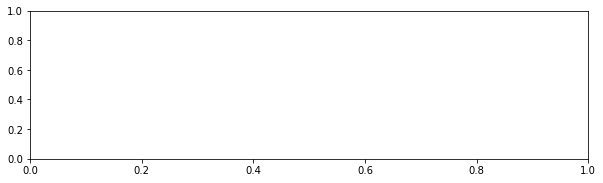

In [19]:
fig = plt.figure()
fig.set_size_inches(10, 6)

plt.figure(1)
plt.subplot(211)
plt.imshow(df_A, interpolation='nearest', cmap='Greys', alpha = .5)
plt.title('Untergruppe I\n(Typ G1b-Schalen)')
#plt.ylabel('Gefäßposition')
plt.yticks(range(len(df_A.index)), df_A.index)
plt.xticks(range(len(df_A.columns)), df_A.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_A):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.gca().xaxis.set_major_locator(plt.NullLocator())

plt.subplot(212)
plt.imshow(df_C, interpolation='nearest', cmap='Greys', alpha = .5)
plt.title("Untergruppe II\n(Typ G1a-Schalen)")
#plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_C.index)), df_C.index)
plt.xticks(range(len(df_C.columns)), df_C.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_C):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-2-1_Pikunda-Munda_Verz-UnterGr.pdf', bbox_inches='tight')
plt.show()

### Mutmaßliche PIKMUN-Schalen am oberen Ubangi

In [20]:
sql = """SELECT
           t_Ort.ort_kurz, 
           t_Komplex.bef_nr, 
           t_Obj.Individuum,
           t_Obj.objID,
           t_Obj.Typ, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_fluss) Like '%Ubangi%')
           AND ((t_Obj.Notiz) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,bef_nr,Individuum,objID,Typ,Art,Tiefe


## Tafeln

In [146]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [147]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,28,1,MBR,87/101,NaN,105,PKM/EPE (?),F3/F5 (?),None,None
1,29,11,MBR,87/101,NaN,"8, 42",PKM (?),None,B3,None
2,32,1,SUN,87/101,NaN,"25, 26, 74",PKM,F3,B1.1,None
3,35,12,SSL,87/101,NaN,42,PKM (?),F3 (?),B2,None
4,37,11,SSL,87/101,NaN,3,PKM (?),None,B2,None
5,38,4,SSL,87/101,NaN,87,PKM (?),None,None,None
6,41,2,BOG,87/102,NaN,7,PKM (?),None,B1.1,None
7,41,18,MIT,87/102,NaN,8,PKM,G1,B3,None
8,42,3,MIT,87/102,NaN,1,PKM (?),E5 (?),B3/B1,None
9,44,3,PIK,87/1,NaN,"-8:6 /I-8:1,6 /I-9:1,3-4",PKM,F3,B3,B1
